Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import zscore
import copy as copy

In [2]:
#read the data into dataframe
campaign_df = pd.read_csv('bank-full.csv')

#take a deep copy of the dataset
campaign_copy_df = copy.deepcopy(campaign_df)

#display firt five records from the dataframe
campaign_copy_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Perform basic EDA operations on the dataframe

In [3]:
print('The shape of the dataframe: ', campaign_copy_df.shape)

The shape of the dataframe:  (45211, 17)


In [4]:
print('The datatype of each attributes:')
print(campaign_copy_df.dtypes)

The datatype of each attributes:
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object


In [5]:
print('Information of the entire dataframe:\n')
print(campaign_copy_df.info())

Information of the entire dataframe:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


In [6]:
#check for the null values
print(campaign_copy_df.isna().sum())
print(campaign_copy_df.isna().any())

print('\n \n INFERENCE : There are no null values present')

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64
age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
Target       False
dtype: bool

 
 INFERENCE : There are no null values present


5 point summary of numerical attributes

In [7]:
campaign_copy_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
#five point summary calculation
inference = {'age': 'There is a slight diff between mean and median.\nThis indicates presence of outliers and skewness.',
             'balance': 'There is a huge diff between mean and median.\nThe standard deviation is very high.\nThis indicates presence of outliers and right skewed as mean > median.',
             'day': 'There is only a slight diff between mean and median.\nThis could be a sign of minimal or no outliers.',
             'duration': 'There is a huge diff between mean and median.\nThe standard deviation is very high.\nThis indicates presence of outliers and right skewed as mean > median.',
             'campaign': 'There is a diff between mean and median.\nThis indicates presence of outliers and right skewness.',
             'pdays': 'There is a huge diff between mean and median.\nThe standard deviation is very high.\nThis indicates presence of outliers and right skewed as mean > median.',
             'previous': 'There is a significant diff between mean and median.\nThe standard deviation is very high.\nThis indicates presence of outliers and right skewed as mean > median.'}
describe = campaign_copy_df.describe()
for i in describe:
    print('\nMean of {}:'.format(i), describe[i]['mean'])
    print('Median of {}:'.format(i), campaign_copy_df[i].median())        
    print('Std of {}:'.format(i),describe[i]['std'])
    print('INFERENCE:', inference[i])


Mean of age: 40.93621021432837
Median of age: 39.0
Std of age: 10.618762040975431
INFERENCE: There is a slight diff between mean and median.
This indicates presence of outliers and skewness.

Mean of balance: 1362.2720576850766
Median of balance: 448.0
Std of balance: 3044.7658291686002
INFERENCE: There is a huge diff between mean and median.
The standard deviation is very high.
This indicates presence of outliers and right skewed as mean > median.

Mean of day: 15.80641879188693
Median of day: 16.0
Std of day: 8.322476153044185
INFERENCE: There is only a slight diff between mean and median.
This could be a sign of minimal or no outliers.

Mean of duration: 258.1630797814691
Median of duration: 180.0
Std of duration: 257.52781226517095
INFERENCE: There is a huge diff between mean and median.
The standard deviation is very high.
This indicates presence of outliers and right skewed as mean > median.

Mean of campaign: 2.763840658246887
Median of campaign: 2.0
Std of campaign: 3.09802088

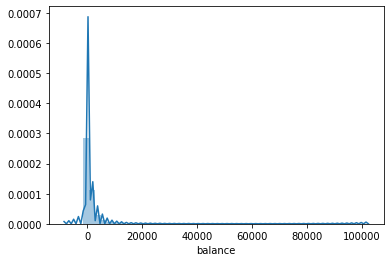

In [11]:
sns.distplot(campaign_copy_df['balance'], kde=True)

e. Checking the presence of outliers using 'IQR'

In [31]:
#outliers calculation
Q1 = campaign_copy_df.quantile(0.25)
Q3 = campaign_copy_df.quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1 - (1.5*IQR)
upper_bound = Q3 + (1.5*IQR)

inference = {'age':'The data is slightly right skewed',
             'balance': 'The data is right skewed',
             'day':'The data is uniformly distributed',
             'duration': 'The data is right skewed',
             'campaign' : 'The data is right skewed',
             'pdays':'The data is right skewed',
             'previous':'The data is right skewed'
            }
for i in describe:
    print('\n',i)    
    left_outlier_count = (campaign_copy_df[i] < lower_bound[i]).sum()
    right_outlier_count = (campaign_copy_df[i] > upper_bound[i]).sum()
    print('Number of left outliers present:', left_outlier_count)
    print('Number of right outliers present:', right_outlier_count)
    print('measure of skewness:', campaign_copy_df[i].skew())    
    print('Inference: ', inference[i])


 age
Number of left outliers present: 0
Number of right outliers present: 487
measure of skewness: 0.6848179257252598
Inference:  The data is slightly right skewed

 balance
Number of left outliers present: 17
Number of right outliers present: 4712
measure of skewness: 8.360308326166326
Inference:  The data is right skewed

 day
Number of left outliers present: 0
Number of right outliers present: 0
measure of skewness: 0.09307901402122411
Inference:  The data is uniformly distributed

 duration
Number of left outliers present: 0
Number of right outliers present: 3235
measure of skewness: 3.144318099423456
Inference:  The data is right skewed

 campaign
Number of left outliers present: 0
Number of right outliers present: 3064
measure of skewness: 4.898650166179674
Inference:  The data is right skewed

 pdays
Number of left outliers present: 0
Number of right outliers present: 8257
measure of skewness: 2.6157154736563477
Inference:  The data is right skewed

 previous
Number of left out

using box plot visualise the outliers

     Left Side-univariate Analysis     Right Side-multivariate Analysis


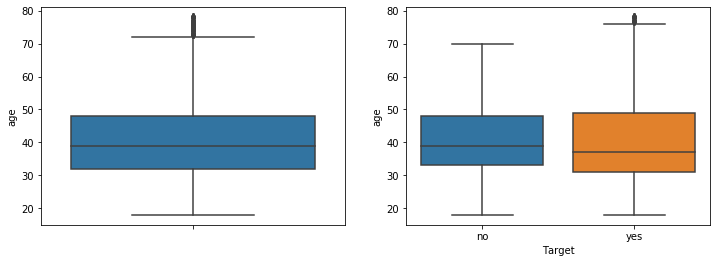

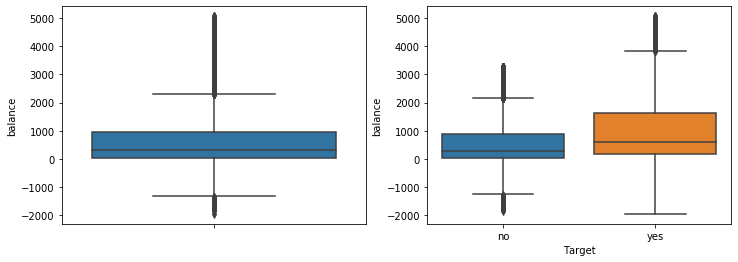

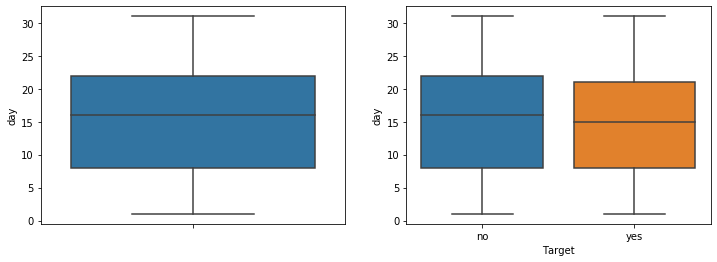

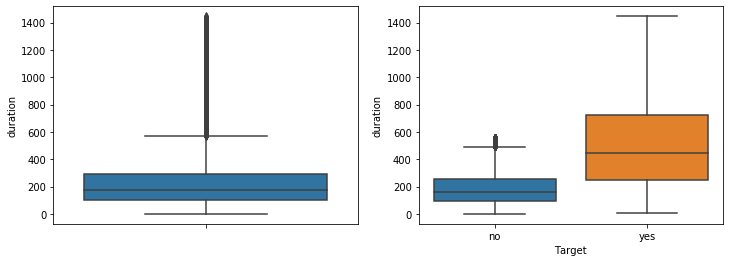

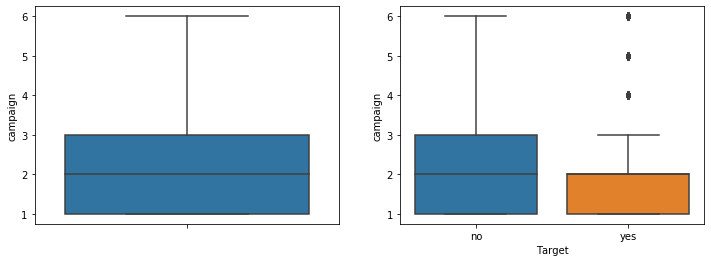

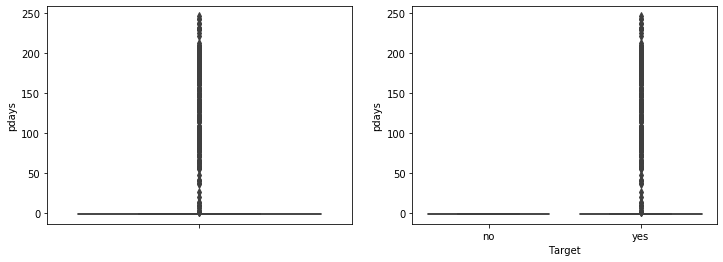

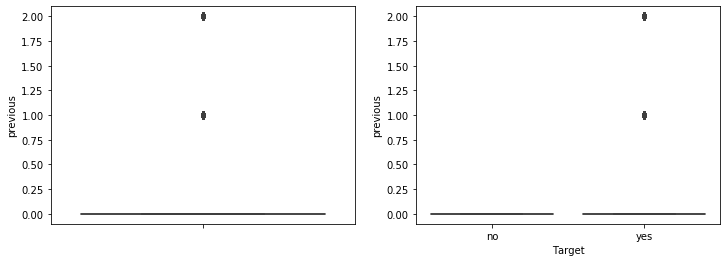

In [58]:
cols = campaign_copy_df.select_dtypes('int64').columns

for i in cols: 
    fig,ax = plt.subplots(nrows= 1, ncols=2,figsize=(12,4))        
    sns.boxplot(campaign_copy_df[i], ax=ax[0],orient = 'vertical')
    sns.boxplot(campaign_copy_df['Target'],campaign_copy_df[i], ax=ax[1])
    
print('     Left Side-univariate Analysis     Right Side-multivariate Analysis')

Inference: All the features have some outliers present in both univariate and multivariate analysis.

Only the attribute 'age' does not have any outliers.

Using scatter plot technique to check the outliers

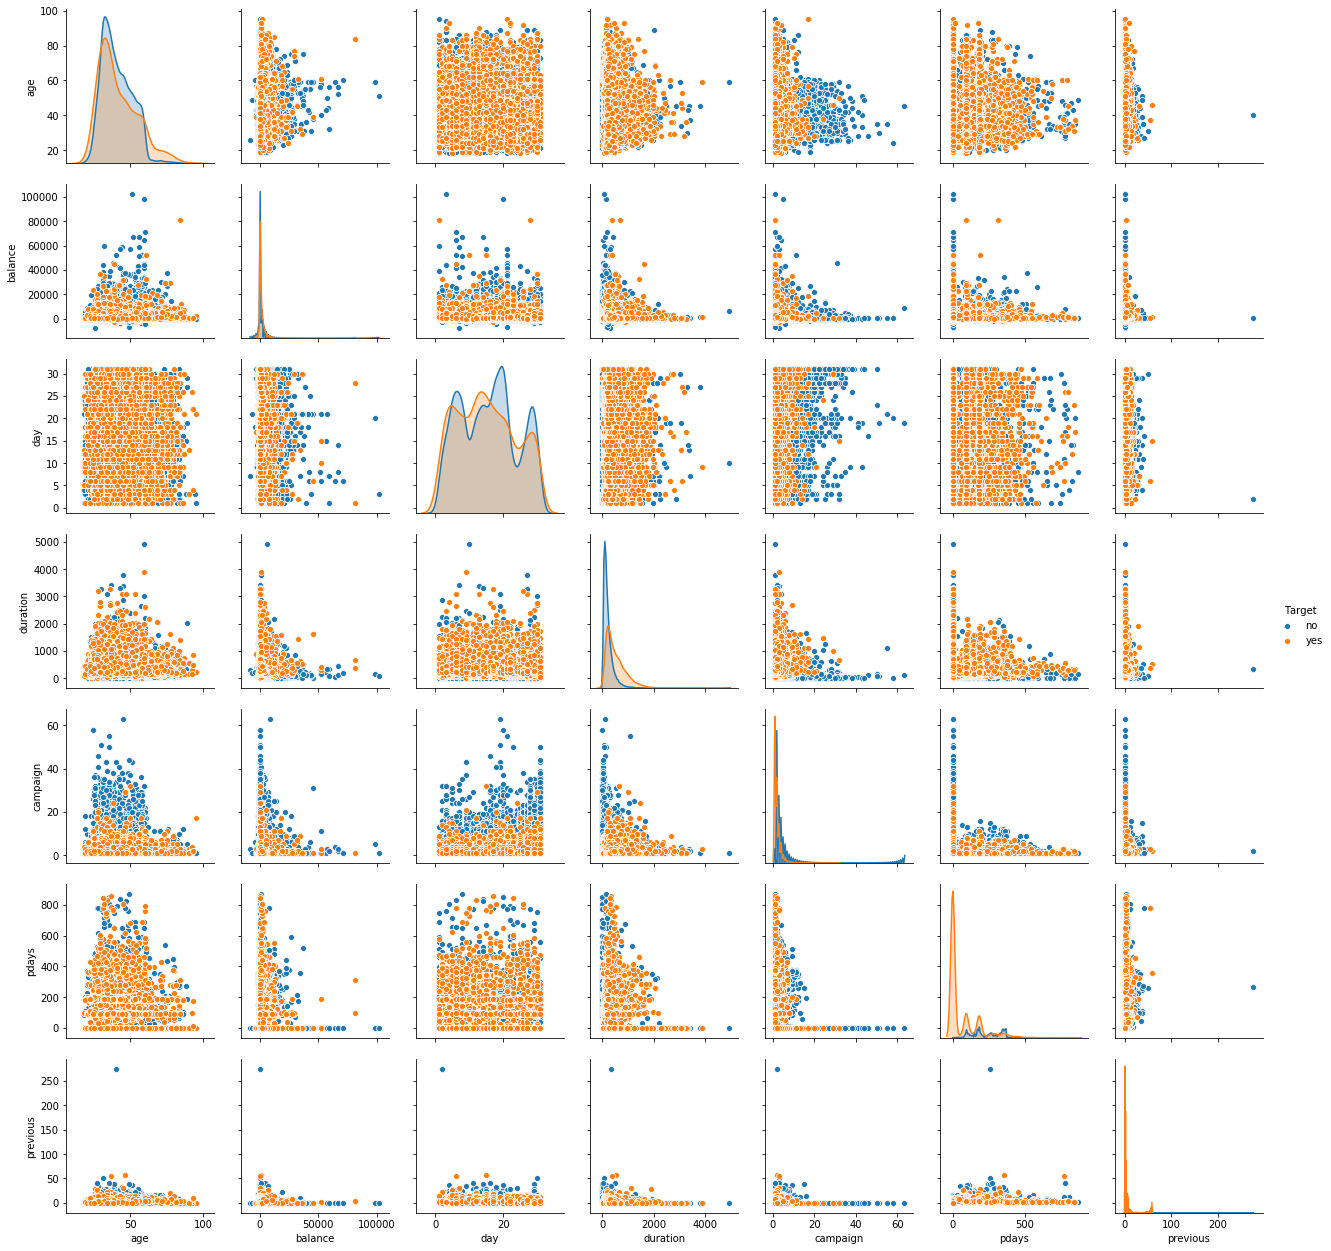

In [47]:
int_cols= ['age','balance','day','duration','campaign','pdays','previous','Target']
sns.pairplot(campaign_copy_df[int_cols],hue='Target',diag_kind='kde')

Inference:There are so many anomalies can be found    

Using skew to check the skewness

In [36]:
print('skew values:')
print(campaign_copy_df[int_cols].skew())

skew values:
age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64


Inference:
The positive values of skewness indicate the variables are right-skewed.

Check outliers using zscores

In [42]:
X_scaled = campaign_copy_df[int_cols].apply(zscore)

#check how many number of records are 3 std away from mean
((X_scaled < -3) | (X_scaled > 3)).sum()

age          381
balance      745
day            0
duration     963
campaign     840
pdays       1723
previous     582
dtype: int64

Delete the outliers

In [51]:
#create a dataframe which has the lower and upper bound for all the features
columns = campaign_copy_df[int_cols].columns[:-1]
class1 = ['no','yes']
outlier_range_df = pd.DataFrame([])
lower_bound = []
upper_bound = []
features = []
class_type = []
for i in columns:
    describe = campaign_copy_df.groupby('Target')[i].describe().reset_index()  
    for c in class1:
        first = int(describe[describe['Target'] == c]['25%'].values)
        third = int(describe[describe['Target'] == c]['75%'].values)
        IQR = third - first
        lower = first - (1.5 * IQR)
        upper = third + (1.5 * IQR)
        lower_bound.append(lower)
        upper_bound.append(upper)
        features.append(i)
        class_type.append(c)
#combining all the values in the dataframe
outlier_range_df['features'] = features
outlier_range_df['class_type'] = class_type
outlier_range_df['lower_bound'] = lower_bound
outlier_range_df['upper_bound'] = upper_bound

In [53]:
outlier_range_df.head()

,features,class_type,lower_bound,upper_bound
0,age,no,10.5,70.5
1,age,yes,2.5,78.5
2,balance,no,-1872.5,3275.5
3,balance,yes,-2713.5,5082.5
4,day,no,-11.5,40.5


Drop the list of outliers

In [54]:
#find the count of outliers correspond to each feature based on the class
columns = campaign_copy_df[int_cols].columns[:-1]
class1 = ['no','yes']
for i in columns:
    for c in class1:
        lower = float(outlier_range_df[(outlier_range_df['features'] == i) &
                                       (outlier_range_df['class_type'] == c)]['lower_bound'].values)
        upper = float(outlier_range_df[(outlier_range_df['features'] == i) &
                                       (outlier_range_df['class_type'] == c)]['upper_bound'].values)
        bool_lower = campaign_copy_df[campaign_copy_df['Target'] == c][i] < lower
        index_lower = bool_lower[bool_lower == True].index
        
        bool_upper = campaign_copy_df[campaign_copy_df['Target'] == c][i] > upper
        index_upper = bool_upper[bool_upper == True].index
                
        #bring the values that exceed the limits into the IQR boundary
        campaign_copy_df.drop(index_lower,axis=0,inplace=True)
        campaign_copy_df.drop(index_upper,axis=0,inplace=True)

Pairplot the data after the removal of outliers

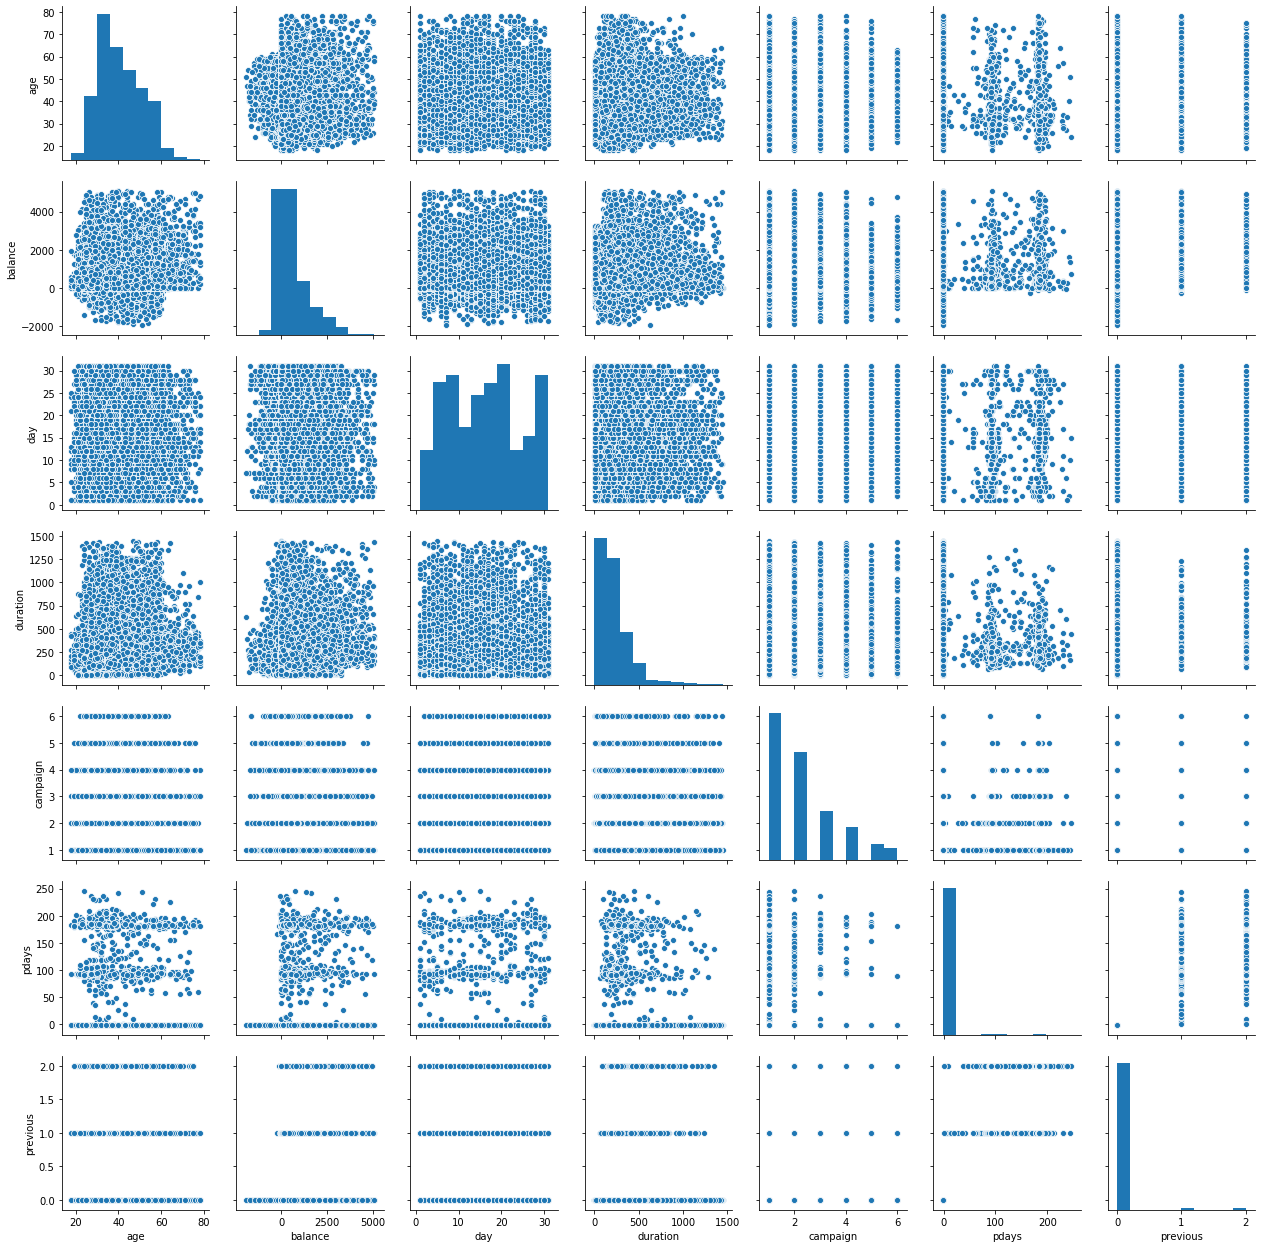

In [56]:
sns.pairplot(campaign_copy_df[int_cols])